# Imports

In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV

# Data Preprocessing

### Load Data

In [2]:
csv_file = os.getcwd() + os.sep + os.sep.join(['csv' , 'cp4.csv'])

In [3]:
df = pd.read_csv(csv_file)

In [4]:
df

,id,lighting_condition,indoor_or_outdoor,weather_condition,officer_in_uniform,officer_injured,officer_rank,subject_armed,subject_age,subject_gender,...,officer_age,wep_taser,wep_chemical,wep_other,wep_member,wep_phys,wep_verb,wep_firearm,district_name,injury
0,4,DAYLIGHT,Outdoor,OTHER,False,False,Police Officer,False,38.0,M,...,37.0,0,0,0,0,1,1,0,12th,1
1,5,DAYLIGHT,Outdoor,OTHER,False,True,Police Officer,False,38.0,M,...,48.0,0,0,0,0,1,1,0,12th,1
2,13,DUSK,Outdoor,CLEAR,True,False,Police Officer,False,22.0,M,...,26.0,0,0,0,1,1,1,0,11th,1
3,14,GOOD ARTIFICIAL,Indoor,CLEAR,True,False,Police Officer,False,21.0,M,...,31.0,0,0,0,0,1,1,0,11th,1
4,16,NaN,NaN,NaN,False,False,Police Officer,False,28.0,M,...,31.0,0,0,0,1,0,1,0,12th,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67014,96446,DAYLIGHT,Outdoor,CLEAR,True,False,Police Officer,False,18.0,M,...,22.0,0,0,1,1,1,1,0,11th,0
67015,96447,NIGHT,Outdoor,CLEAR,True,False,Police Officer,False,33.0,M,...,31.0,0,0,0,1,1,1,0,11th,0
67016,96448,NIGHT,Outdoor,CLEAR,True,True,Police Officer,False,33.0,M,...,35.0,0,0,0,1,1,1,0,11th,0
67017,96449,DAYLIGHT,Outdoor,CLEAR,True,False,Police Officer,False,18.0,M,...,36.0,0,0,0,1,1,1,0,11th,0


In [5]:
df.isnull().sum()

id                       0
lighting_condition    3638
indoor_or_outdoor     3605
weather_condition     3799
officer_in_uniform       0
officer_injured          0
officer_rank             1
subject_armed           64
subject_age             30
subject_gender          58
subject_race           878
officer_id             287
officer_gender         287
officer_race           287
officer_age            288
wep_taser                0
wep_chemical             0
wep_other                0
wep_member               0
wep_phys                 0
wep_verb                 0
wep_firearm              0
district_name         2005
injury                   0
dtype: int64

In [6]:
df = df.drop(columns = ['id', 'officer_id'])

### One hot encode categorical features

In [7]:
df_recoded = pd.get_dummies(df, drop_first=True)

In [8]:
for column in df.columns:
    df_recoded.loc[df[column].isnull(), df_recoded.columns.str.startswith(f'{column}_')] = np.nan

In [9]:
df_recoded = df_recoded.astype('float64')

### Impute Missing Data Using Multivariate Iterative Imputation

In [10]:
imp = IterativeImputer(random_state=42, tol = 0.01, min_value = 0, max_value = 1)

In [11]:
imputed_array = imp.fit_transform(df_recoded)

In [12]:
df_final = pd.DataFrame(data = imputed_array, columns = df_recoded.columns)

In [13]:
df_final

,officer_in_uniform,officer_injured,subject_age,officer_age,wep_taser,wep_chemical,wep_other,wep_member,wep_phys,wep_verb,...,district_name_25th,district_name_2nd,district_name_31th,district_name_3rd,district_name_4th,district_name_5th,district_name_6th,district_name_7th,district_name_8th,district_name_9th
0,0.0,0.0,38.0,37.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,38.0,48.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,22.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,21.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,28.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67014,1.0,0.0,18.0,22.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67015,1.0,0.0,33.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67016,1.0,1.0,33.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67017,1.0,0.0,18.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_final.isnull().sum()

officer_in_uniform    0
officer_injured       0
subject_age           0
officer_age           0
wep_taser             0
                     ..
district_name_5th     0
district_name_6th     0
district_name_7th     0
district_name_8th     0
district_name_9th     0
Length: 86, dtype: int64

# Train Model

### Split Train/Test Data

In [15]:
X_train, X_test = train_test_split(df_final, test_size=0.2, random_state=42)

### Train Calibrated Random Forest Classifier with Using Hyperparameter Grid Search

Using 5-fold cross-validation to assess model performance. 

!!! Warning, this was run on a server with 4 CPUs and a total of 48 CPU cores using multithreading. Running on a standard PC/Mac CPU may take over an hour. These cells have therefore been commented out with output provided for you. You may instead run the cells below (starting at 26) where a random forest model is trained with the best hyperparameters from this hyperparameter search.

In [16]:
clf = CalibratedClassifierCV(base_estimator=RandomForestClassifier(random_state=42, 
                                                                   class_weight = 'balanced', 
                                                                   n_jobs = 48))
param_grid = {'base_estimator__max_depth': [10, 25, 50, None], 
              'base_estimator__max_samples': [1000, 10000, None], 
              'base_estimator__max_features': [1, 25, 50, 'auto', 'log2', None]}

In [17]:
search = GridSearchCV(clf, param_grid, cv=5, n_jobs = 48, scoring = 'roc_auc')

In [18]:
search.fit(X_train.drop(columns = ['wep_firearm', 'injury']), X_train['wep_firearm'])

GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                                                    n_jobs=48,
                                                                                    random_state=42)),
             n_jobs=48,
             param_grid={'base_estimator__max_depth': [10, 25, 50, None],
                         'base_estimator__max_features': [1, 25, 50, 'auto',
                                                          'log2', None],
                         'base_estimator__max_samples': [1000, 10000, None]},
             scoring='roc_auc')

In [19]:
search.best_score_

0.9737500488613515

In [20]:
y_pred = search.predict(X_test.drop(columns = ['wep_firearm', 'injury']))

In [21]:
y_pred_prob = search.predict_proba(X_test.drop(columns = ['wep_firearm', 'injury']))[:,1]

0.007032043240056962


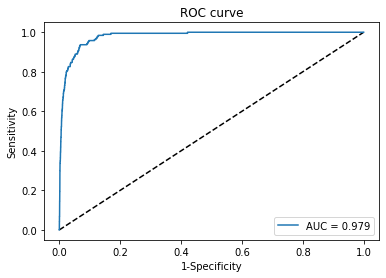

In [23]:
fpr, tpr, thresholds = roc_curve(X_test['wep_firearm'], y_pred_prob)
youden_values = list(tpr - fpr)
youden_index = youden_values.index(max(youden_values))
optimal_threshold = thresholds[youden_index]
print(optimal_threshold)
auc_1 = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_1))
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
trans = np.vectorize(lambda x: 1 if x > optimal_threshold else 0)
y_pred =  trans(y_pred_prob)

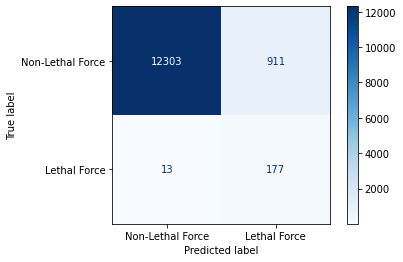

Classification Report
                  precision    recall  f1-score   support

Non-Lethal Force       1.00      0.93      0.96     13214
    Lethal Force       0.16      0.93      0.28       190

        accuracy                           0.93     13404
       macro avg       0.58      0.93      0.62     13404
    weighted avg       0.99      0.93      0.95     13404



In [25]:
cm = confusion_matrix(X_test['wep_firearm'], y_pred)
target_names = ['Non-Lethal Force', 'Lethal Force']
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
disp = disp.plot(cmap='Blues', values_format='.0f')
plt.show()
print('Classification Report')
print(classification_report(X_test['wep_firearm'], y_pred, target_names=target_names))

### Train Calibrated Random Forest Model with Best Hyperparameters from Grid Search

In [26]:
clf = CalibratedClassifierCV(base_estimator=RandomForestClassifier(random_state=42,
                                                                   max_depth = 25,
                                                                   class_weight = 'balanced'))

In [27]:
clf.fit(X_train.drop(columns = ['wep_firearm', 'injury']), X_train['wep_firearm'])

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=25,
                                                             random_state=42))

In [28]:
y_pred = clf.predict(X_test.drop(columns = ['wep_firearm', 'injury']))

In [29]:
y_pred_prob = clf.predict_proba(X_test.drop(columns = ['wep_firearm', 'injury']))[:,1]

0.007032043240056964


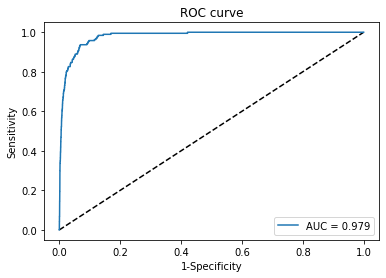

In [31]:
fpr, tpr, thresholds = roc_curve(X_test['wep_firearm'], y_pred_prob)
youden_values = list(tpr - fpr)
youden_index = youden_values.index(max(youden_values))
optimal_threshold = thresholds[youden_index]
print(optimal_threshold)
auc_2 = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_2))
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
trans = np.vectorize(lambda x: 1 if x > optimal_threshold else 0)
y_pred =  trans(y_pred_prob)

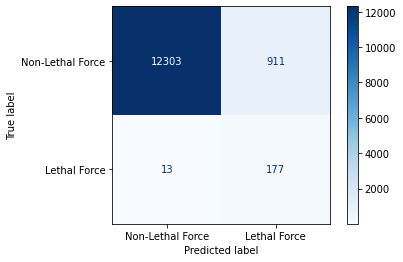

Classification Report
                  precision    recall  f1-score   support

Non-Lethal Force       1.00      0.93      0.96     13214
    Lethal Force       0.16      0.93      0.28       190

        accuracy                           0.93     13404
       macro avg       0.58      0.93      0.62     13404
    weighted avg       0.99      0.93      0.95     13404



In [33]:
cm = confusion_matrix(X_test['wep_firearm'], y_pred)
target_names = ['Non-Lethal Force', 'Lethal Force']
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
disp = disp.plot(cmap='Blues', values_format='.0f')
plt.show()
print('Classification Report')
print(classification_report(X_test['wep_firearm'], y_pred, target_names=target_names))

### List and Plot Features by Importance for Model Predictions

In [35]:
clf.base_estimator.fit(X_train.drop(columns = ['wep_firearm', 'injury']), X_train['wep_firearm'])
importances = clf.base_estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.base_estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.drop(columns = ['wep_firearm', 'injury']).shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.drop(columns = ['wep_firearm', 'injury']).columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. subject_armed_True (0.318347)
2. wep_phys (0.280472)
3. subject_age (0.039270)
4. officer_age (0.038541)
5. wep_taser (0.030623)
6. officer_in_uniform (0.027852)
7. subject_gender_M (0.018587)
8. wep_verb (0.013833)
9. officer_injured (0.011401)
10. indoor_or_outdoor_Outdoor (0.011246)
11. wep_other (0.009892)
12. officer_race_White (0.008346)
13. wep_member (0.008179)
14. officer_race_Black (0.007771)
15. lighting_condition_GOOD ARTIFICIAL (0.007428)
16. lighting_condition_NIGHT (0.007353)
17. subject_race_BLACK (0.007154)
18. lighting_condition_DAYLIGHT (0.007092)
19. subject_race_HISPANIC (0.006529)
20. officer_gender_M (0.006141)
21. district_name_11th (0.005909)
22. officer_race_Hispanic (0.005642)
23. weather_condition_RAIN (0.005500)
24. district_name_4th (0.005461)
25. lighting_condition_POOR ARTIFICIAL (0.005238)
26. subject_race_WHITE (0.004960)
27. weather_condition_FOG/SMOKE/HAZE (0.004753)
28. lighting_condition_DUSK (0.004670)
29. district_name_18th (0

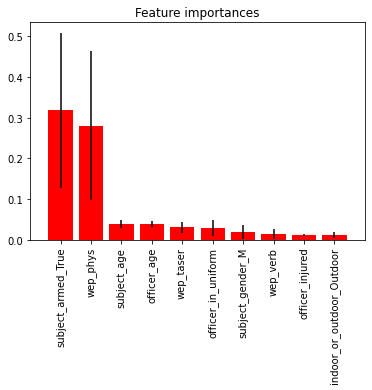

In [36]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,10), importances[indices[0:10]],
        color="r", yerr=std[indices[0:10]], align="center")
plt.xticks(range(0,10), X_train.drop(columns = ['wep_firearm', 'injury']).columns[indices[0:10]], rotation = 90)
plt.xlim(-1,10)
# plt.savefig('/home/rmw362/CPDPCP4/Featureimportance.png', bbox_inches = "tight")
plt.show()

# Extras

### Visualize a random individual decision tree from the trained random forest model

In [38]:
from sklearn import tree
fn = list(X_train.drop(columns = ['wep_firearm', 'injury']).columns)
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
r = tree.export_text(clf.base_estimator.estimators_[5],
               feature_names = fn)
print(r)

|--- subject_gender_M <= 1.00
|   |--- officer_age <= 30.50
|   |   |--- wep_phys <= 0.50
|   |   |   |--- subject_race_BLACK <= 0.88
|   |   |   |   |--- class: 0.0
|   |   |   |--- subject_race_BLACK >  0.88
|   |   |   |   |--- officer_age <= 27.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- officer_age >  27.50
|   |   |   |   |   |--- district_name_5th <= 0.02
|   |   |   |   |   |   |--- officer_gender_M <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- officer_gender_M >  0.50
|   |   |   |   |   |   |   |--- district_name_11th <= 0.50
|   |   |   |   |   |   |   |   |--- officer_age <= 29.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- officer_age >  29.50
|   |   |   |   |   |   |   |   |   |--- wep_taser <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lighting_condition_DAYLIGHT <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   | 

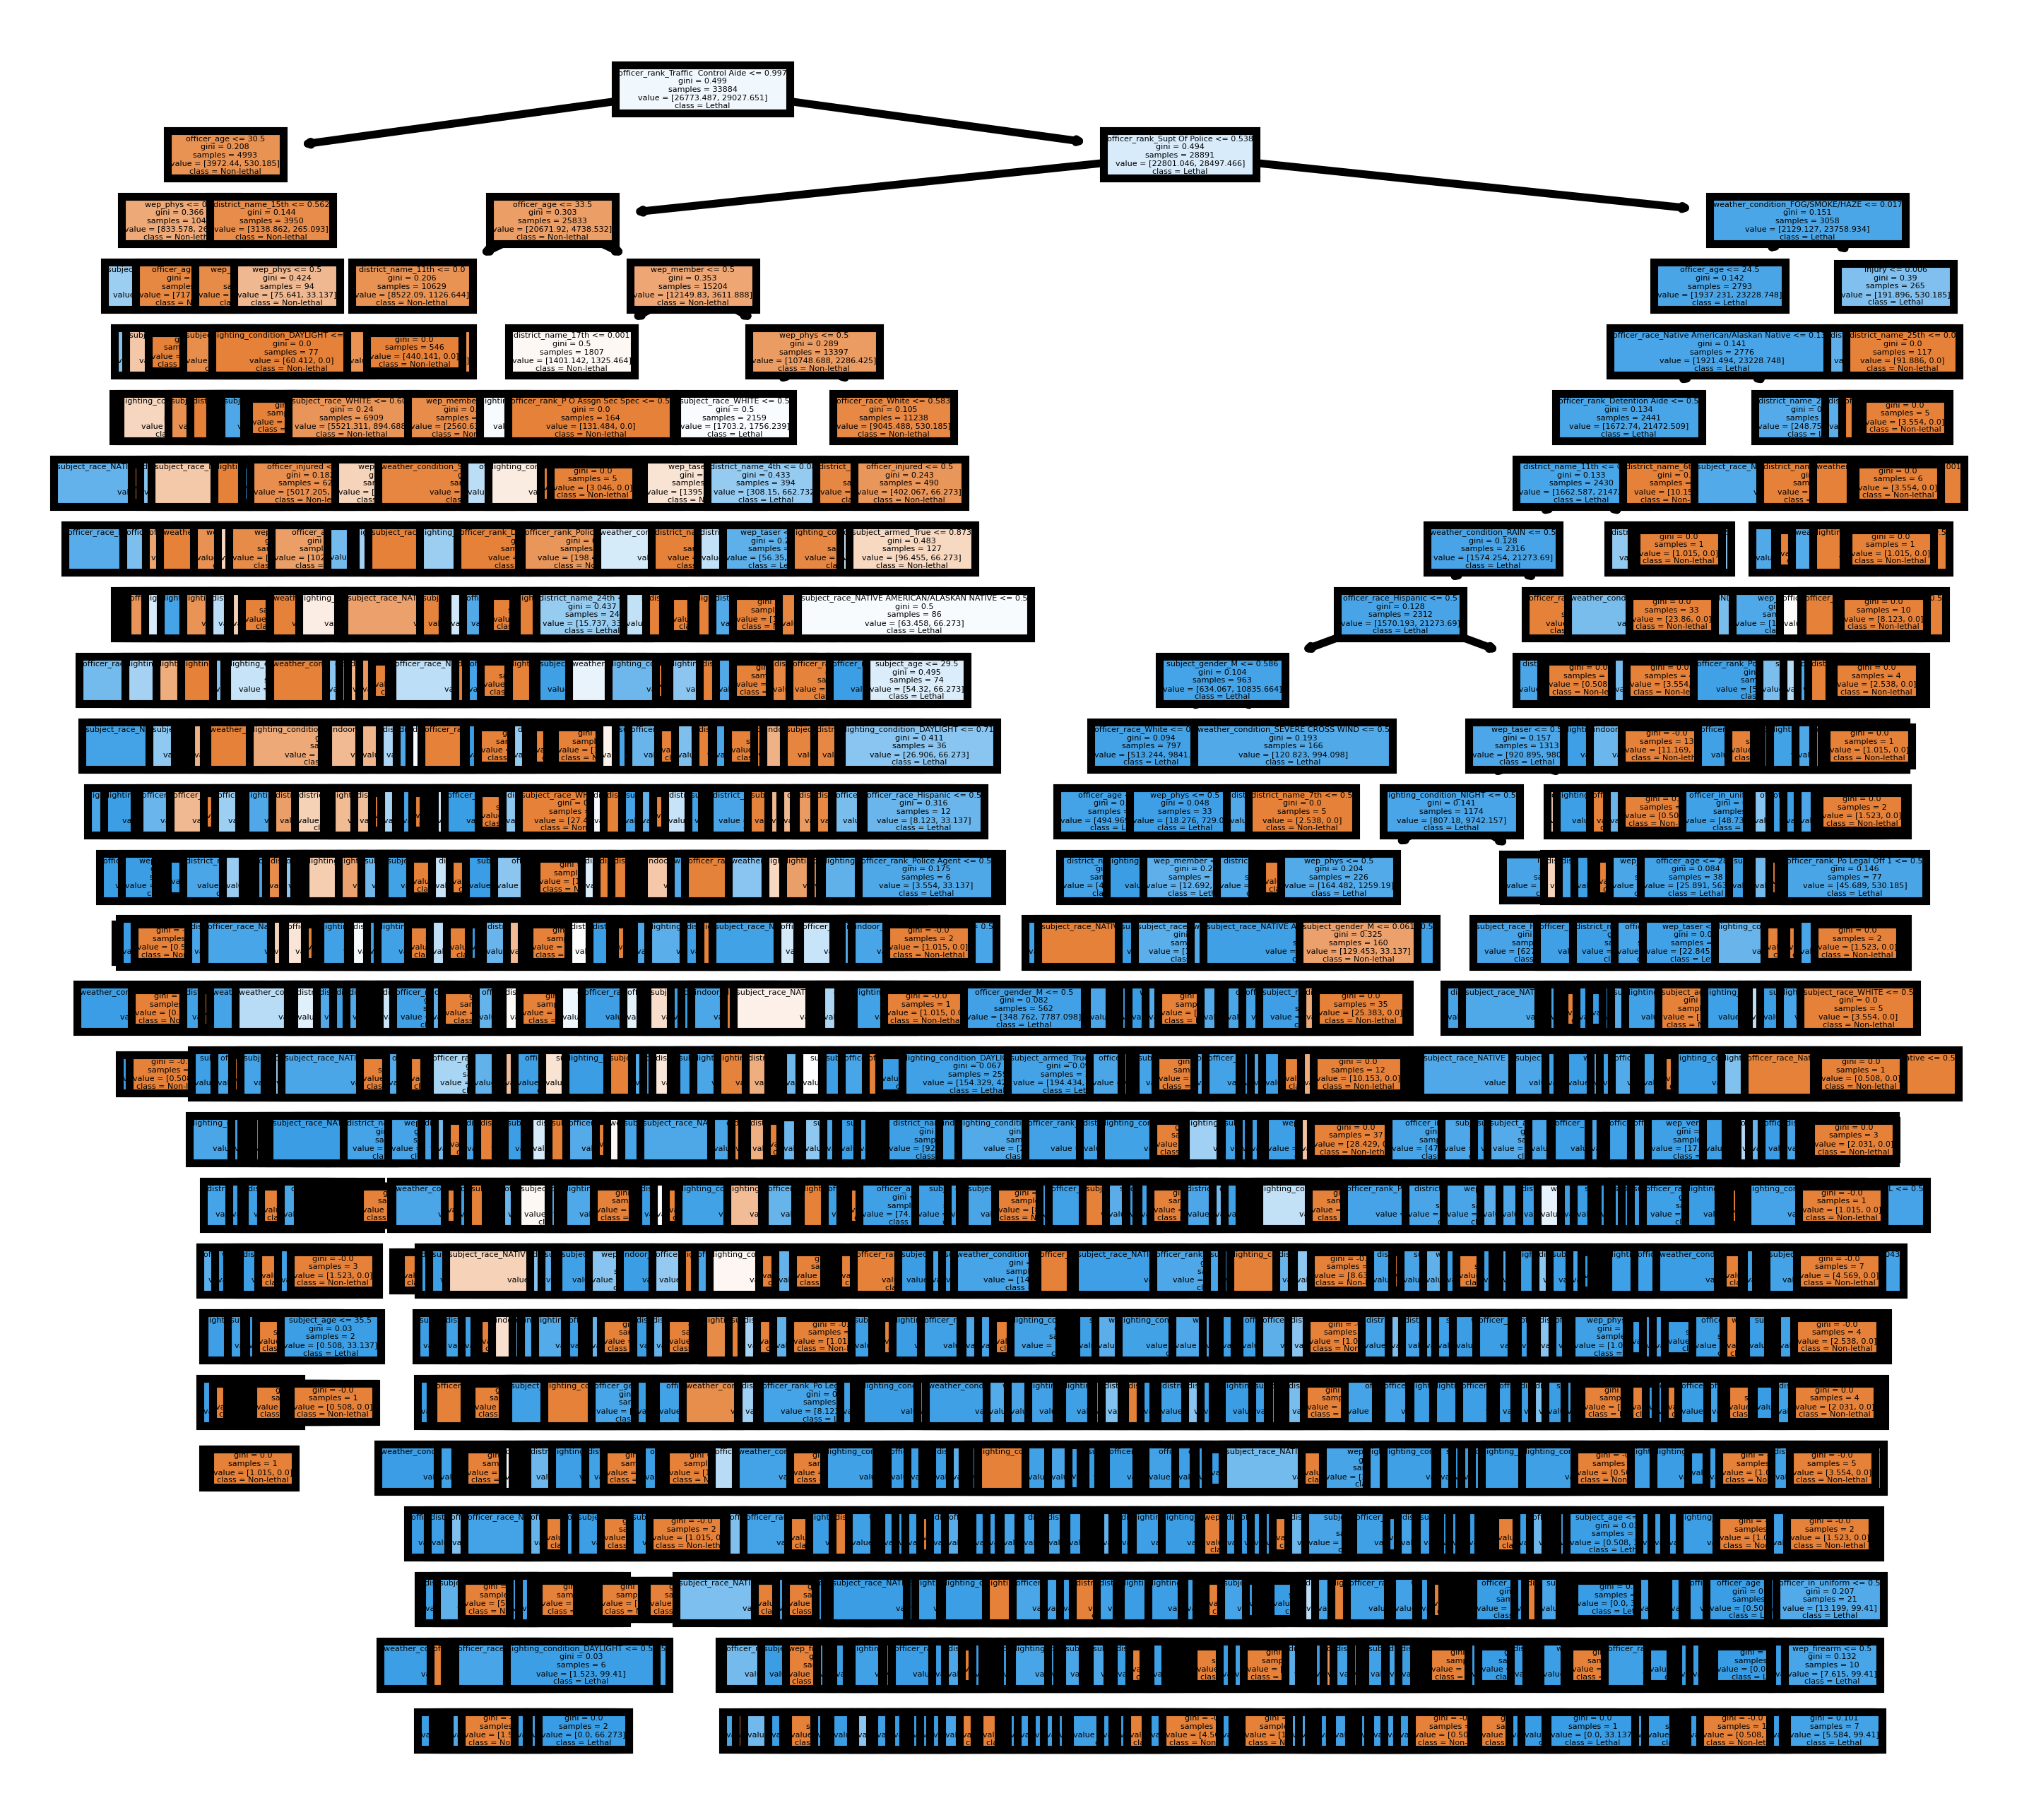

In [39]:
from sklearn import tree
fn = X_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.base_estimator.estimators_[5],
               feature_names = fn, 
               class_names = ['Non-lethal', 'Lethal'],
               filled = True);
plt.show()